In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
df = pd.read_csv('dataset_colesterol.csv')

In [3]:
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,6,B,Não,Baixo,68.0,66.8,170.0,185.31
6,7,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,8,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,9,O,Não,Baixo,62.0,81.3,166.0,235.30
9,10,B,Sim,Alto,44.0,32.7,165.0,97.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
df.drop('Id', axis=1, inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [7]:
df.isna().sum()

Idade                          3
Peso                           3
Altura                         3
Colesterol                     0
Grupo Sanguíneo_A              0
Grupo Sanguíneo_AB             0
Grupo Sanguíneo_B              0
Grupo Sanguíneo_O              0
Fumante_Não                    0
Fumante_Sim                    0
Nível de Atividade_Alto        0
Nível de Atividade_Baixo       0
Nível de Atividade_Moderado    0
dtype: int64

In [8]:
idade_media = df['Idade'].median()
idade_media
peso_medio = df['Peso'].median()
peso_medio
altura_media = df['Altura'].median()
altura_media
df.fillna(value={'Idade': idade_media}, inplace=True)
df.fillna(value={'Peso': peso_medio}, inplace=True)
df.fillna(value={'Altura': altura_media}, inplace=True)

<Axes: >

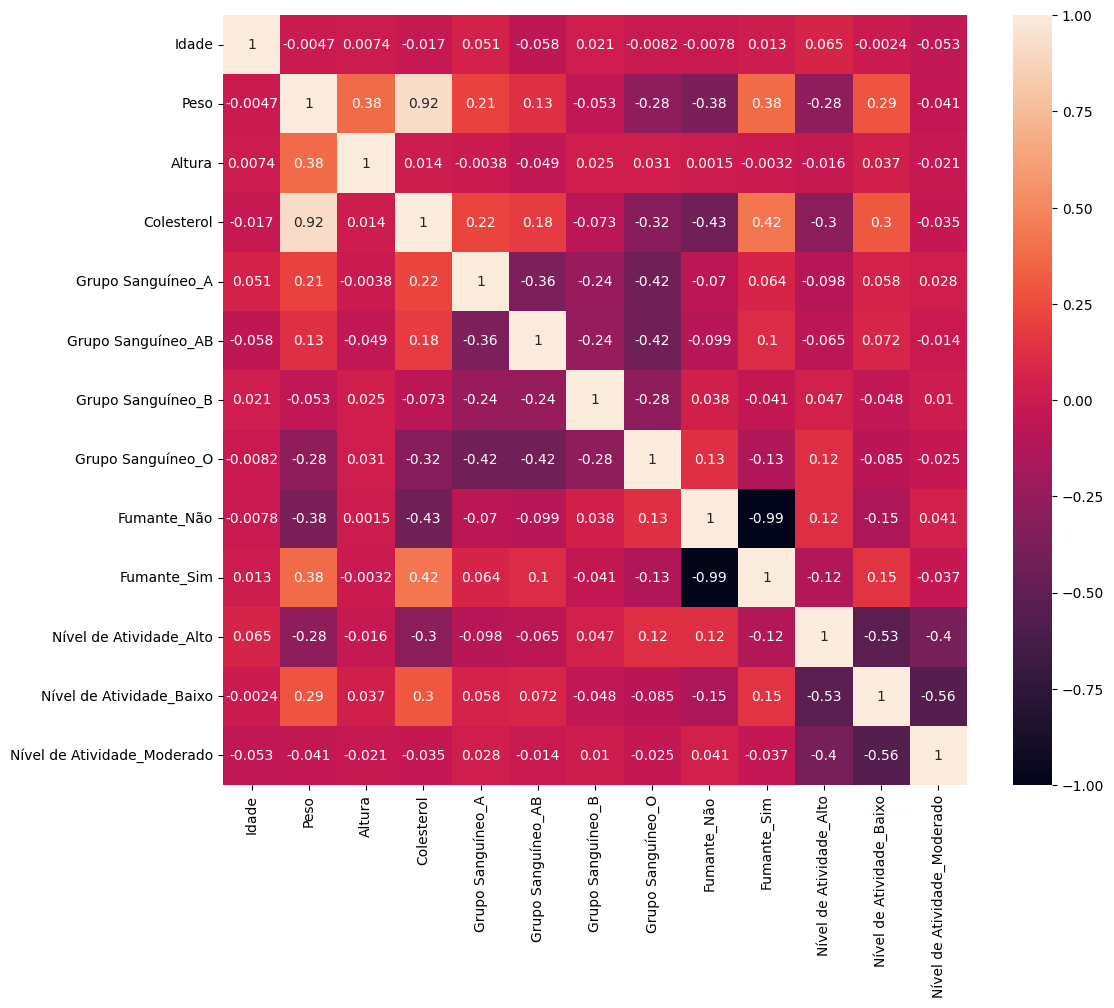

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=df.corr(), annot=True, vmax=1, vmin=-1)

In [10]:
pps_matrix_reg = pps.matrix(df)

In [11]:
pps_matrix_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               169 non-null    object 
 1   y               169 non-null    object 
 2   ppscore         169 non-null    float64
 3   case            169 non-null    object 
 4   is_valid_score  169 non-null    bool   
 5   metric          156 non-null    object 
 6   baseline_score  169 non-null    float64
 7   model_score     169 non-null    float64
 8   model           156 non-null    object 
dtypes: bool(1), float64(3), object(5)
memory usage: 10.9+ KB


In [12]:
pps_matrix_reg[pps_matrix_reg['x'] == 'Colesterol'].pivot

<bound method DataFrame.pivot of              x                            y   ppscore            case  \
39  Colesterol                        Idade  0.000000      regression   
40  Colesterol                         Peso  0.438295      regression   
41  Colesterol                       Altura  0.000000      regression   
42  Colesterol                   Colesterol  1.000000  predict_itself   
43  Colesterol            Grupo Sanguíneo_A  0.000000      regression   
44  Colesterol           Grupo Sanguíneo_AB  0.000000      regression   
45  Colesterol            Grupo Sanguíneo_B  0.000000      regression   
46  Colesterol            Grupo Sanguíneo_O  0.000000      regression   
47  Colesterol                  Fumante_Não  0.021680      regression   
48  Colesterol                  Fumante_Sim  0.000000      regression   
49  Colesterol      Nível de Atividade_Alto  0.000000      regression   
50  Colesterol     Nível de Atividade_Baixo  0.004695      regression   
51  Colesterol  Ní

In [14]:
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']
model_reg = LinearRegression()
model_reg.fit(X, y)
feat_imp_reg = pd.Series(model_reg.coef_, index=X.columns)

<Axes: >

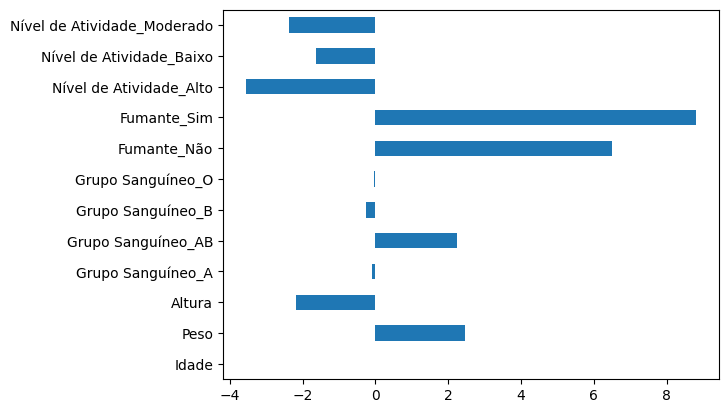

In [15]:
feat_imp_reg.plot(kind='barh')